# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import re
from sklearn.preprocessing import MultiLabelBinarizer

# Read The Data

In [112]:
data=pd.read_csv(r"D:\Python\Notebooks\cleaned_recipes.csv")


In [113]:
data.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,...,ProteinContent,RecipeInstructions,Images,DietCategory,high-fiber,high-protein,low-calorie,low-carb,low-fat,low-sodium
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"['blueberries', 'granulated sugar', 'vanilla y...",170.9,2.5,1.3,8.0,...,3.2,"['Toss 2 cups berries with sugar.', 'Let stand...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-fat', 'low-calorie', 'low-sodium']",0,0,1,0,1,1
1,41,Carina's Tofu-Vegetable Kebabs,20,1440,1460,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",536.1,24.0,3.8,0.0,...,29.3,"['Drain the tofu', 'carefully squeezing out ex...",['https://img.sndimg.com/food/image/upload/w_5...,"['high-protein', 'high-fiber']",1,1,0,0,0,0
2,42,Cabbage Soup,30,20,50,"['plain tomato juice', 'cabbage', 'onion', 'ca...",103.6,0.4,0.1,0.0,...,4.3,['Mix everything together and bring to a boil....,['https://img.sndimg.com/food/image/upload/w_5...,"['low-carb', 'low-fat', 'low-calorie']",0,0,1,1,1,0
3,45,Buttermilk Pie With Gingersnap Crumb Crust,50,30,80,"['sugar', 'margarine', 'egg', 'flour', 'salt',...",228.0,7.1,1.7,24.5,...,4.2,"['Preheat oven to 350°F.', 'Make pie crust', '...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-fat', 'low-calorie', 'low-sodium']",0,0,1,0,1,1
4,46,A Jad - Cucumber Pickle,0,25,25,"['rice vinegar', 'haeo']",4.3,0.0,0.0,0.0,...,0.1,"['Slice the cucumber in four lengthwise', 'the...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-carb', 'low-fat', 'low-calorie', 'low-so...",0,0,1,1,1,1


# Explore The Data

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375703 entries, 0 to 375702
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               375703 non-null  int64  
 3   PrepTime               375703 non-null  int64  
 4   TotalTime              375703 non-null  int64  
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-nu

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375703 entries, 0 to 375702
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               375703 non-null  int64  
 3   PrepTime               375703 non-null  int64  
 4   TotalTime              375703 non-null  int64  
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-nu

## Missing Values

In [ ]:
missing_percent = data.isnull().sum() / len(data) * 100
print(missing_percent.sort_values(ascending=False))

## Outliers

In [ ]:
def detect_outliers(df):
    outliers = {}
    columns_numeric = df.select_dtypes('number')
    for col in columns_numeric:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[col] = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        
    return outliers

In [ ]:
outliers_data = detect_outliers(data)
print(outliers_data)

In [ ]:
data.iloc[0,[5,-1]]

In [ ]:
data.iloc[0]

# Preprocess the data

In [ ]:


def Clean_Recipe_Text(text):
    """
    Extracts ingredients from a string formatted as 'c("ingredient1", "ingredient2", ...)'.
    
    Args:
        text (str): The input string containing ingredients.
    
    Returns:
        list: A list of cleaned ingredients.
    """
    # Use regex to extract content inside the parentheses
    match = re.search(r'c\(([^)]+)\)', text)
    if not match:
        return []  # Return empty list if no match is found
    
    # Extract the matched group and split into individual ingredients
    ingredients = match.group(1).split(', ')
    
    # Remove quotes and whitespace from each ingredient
    ingredients = [ingredient.strip('"') for ingredient in ingredients]
    
    return ingredients

In [ ]:
data['RecipeIngredientParts'] = data['RecipeIngredientParts'].apply(Clean_Recipe_Text)
data['RecipeInstructions'] = data['RecipeInstructions'].apply(Clean_Recipe_Text)



In [ ]:
data.head()

# Merge Images data set

In [4]:
imgs = pd.read_csv(r"D:\DataSets\images_diet.csv", usecols = ['Images'], nrows = 375703)

In [ ]:
imgs.head()

In [ ]:
imgs['Images'] = imgs['Images'].fillna("character(0)")

In [ ]:
def process_Images(string):
    
    string = string.strip().replace('\n', '')
    
    
    if string.startswith("c("):
        
        processed_string = f"[{string[2:-1]}]"
    elif string.startswith("charac"):
        
        processed_string = "[]"
    elif string.startswith('"'):
        
        processed_string = f"[{string}]"
    else:
        processed_string = string  

    return processed_string



imgs['Images'] = imgs['Images'].apply(process_Images)
import ast
imgs['Images'] = imgs['Images'].apply(ast.literal_eval)

In [ ]:
imgs

In [ ]:
all_data = pd.concat([data, imgs],axis = 1)
all_data

In [ ]:
food = []

for row in all_data.to_numpy()[:1000]:
    dd = {}  # Create a new dictionary for each row
    for item, col in zip(row, all_data.columns):
        dd[col] = item
        if col == 'RecipeId':
            id = item
            
    food.append(dd)  # Assign the new dictionary to the corresponding id

print(food[0:5])


In [ ]:
#import json

In [ ]:
#with open('food_data.json', 'w') as fout:
#    json.dump(food , fout)

# Convert Nutrition Columns to Numeric 

Some values might be stored as strings, so we should convert them to numbers.

In [3]:
# Convert all nutrition columns to numeric values
nutrition_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
                  'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

all_data[nutrition_cols] = all_data[nutrition_cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values
print(all_data.isnull().sum())


NameError: name 'all_data' is not defined

# Categorize meals

In [4]:
def classify_meal(row):
    categories = []
    if row['ProteinContent'] > 20:
        categories.append('high-protein')
    if row['CarbohydrateContent'] < 30:
        categories.append('low-carb')
    if row['FatContent'] < 10:
        categories.append('low-fat')
    if row['Calories'] < 250:
        categories.append('low-calorie')
    if row['FiberContent'] > 5:
        categories.append('high-fiber')
    if row['SodiumContent'] < 300:
        categories.append('low-sodium')
    
    return categories

# Apply function
data['DietCategory'] = data.apply(classify_meal, axis=1)





In [5]:
data['DietCategory'].head()[0][0]

'low-fat'

# Handle Categorical Data

In [6]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'DietCategory' column
vals = mlb.fit_transform(data['DietCategory'])

# Get the classes (categories)
cols = mlb.classes_

# Display the results
print("Categories:", cols)
print("Encoded Values:\n", vals)

Categories: ['high-fiber' 'high-protein' 'low-calorie' 'low-carb' 'low-fat'
 'low-sodium']
Encoded Values:
 [[0 0 1 0 1 1]
 [1 1 0 0 0 0]
 [0 0 1 1 1 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 1 1 1]]


In [7]:
labels = pd.DataFrame(mlb.fit_transform(data['DietCategory']),columns=mlb.classes_, index=data.index)

data = pd.concat([data,labels],axis=1)

In [8]:
data.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,...,low-calorie,low-carb,low-fat,low-sodium,high-fiber,high-protein,low-calorie,low-carb,low-fat,low-sodium
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"['blueberries', 'granulated sugar', 'vanilla y...",170.9,2.5,1.3,8.0,...,1,0,1,1,0,0,1,0,1,1
1,41,Carina's Tofu-Vegetable Kebabs,20,1440,1460,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",536.1,24.0,3.8,0.0,...,0,0,0,0,1,1,0,0,0,0
2,42,Cabbage Soup,30,20,50,"['plain tomato juice', 'cabbage', 'onion', 'ca...",103.6,0.4,0.1,0.0,...,1,1,1,0,0,0,1,1,1,0
3,45,Buttermilk Pie With Gingersnap Crumb Crust,50,30,80,"['sugar', 'margarine', 'egg', 'flour', 'salt',...",228.0,7.1,1.7,24.5,...,1,0,1,1,0,0,1,0,1,1
4,46,A Jad - Cucumber Pickle,0,25,25,"['rice vinegar', 'haeo']",4.3,0.0,0.0,0.0,...,1,1,1,1,0,0,1,1,1,1


In [9]:
# Save the data

# data.to_csv("cleaned_recipes.csv", index=False)

# Convert string columns to lists

In [125]:
import ast

In [127]:
type(data.iloc[5].iloc[5])

str

In [128]:
type(data.iloc[15].iloc[15])

str

In [130]:
data["RecipeIngredientParts"] = data["RecipeIngredientParts"].apply(ast.literal_eval)

In [131]:
data[ "RecipeInstructions"] = data["RecipeInstructions"].apply(ast.literal_eval)

In [132]:
type(data.iloc[5].iloc[5])

list

In [133]:
type(data.iloc[15].iloc[15])

list

In [134]:
# Save the data
data.to_csv("cleaned_recipes.csv",index = False)

# Normalize The Numeric Columns

In [135]:
Scaler = StandardScaler()

# Building The model

In [136]:
data[["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"]]

,Calories,FatContent,ProteinContent,CarbohydrateContent
0,170.9,2.5,3.2,37.1
1,536.1,24.0,29.3,64.2
2,103.6,0.4,4.3,25.1
3,228.0,7.1,4.2,37.5
4,4.3,0.0,0.1,1.1
...,...,...,...,...
375698,422.3,28.6,27.3,14.1
375699,84.3,2.1,0.6,16.6
375700,358.9,19.8,4.8,41.5
375701,316.6,12.5,3.9,48.5


## Elbow Mehtod

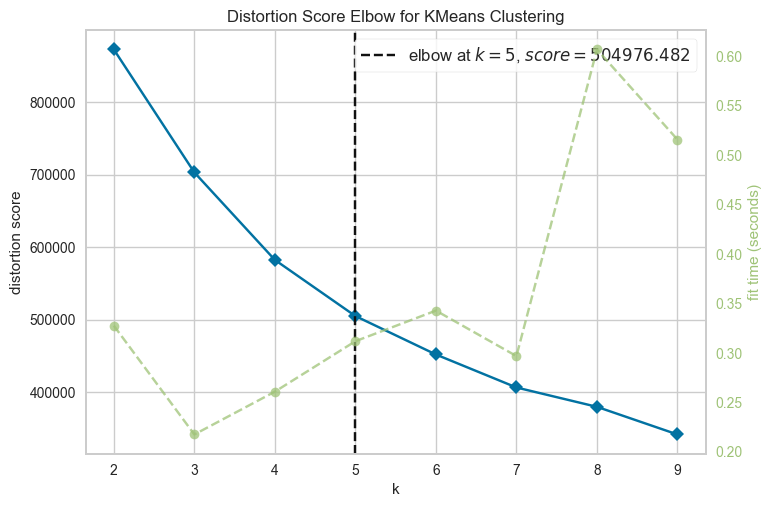

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [137]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import KElbowVisualizer


selected_df = Scaler.fit_transform(data[["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"]])

# Use the Elbow Method to find the optimal number of clusters
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))  # Test k values from 2 to 10

# Fit the visualizer to the data
visualizer.fit(selected_df)

# Display the elbow plot
visualizer.show()

# Apply K-Mean

In [138]:
selected_df = pd.DataFrame(selected_df, columns =["Calories", "FatContent", "ProteinContent", "CarbohydrateContent"])

In [139]:
selected_df

,Calories,FatContent,ProteinContent,CarbohydrateContent
0,-0.550934,-0.912819,-0.683381,0.375022
1,1.474285,1.131396,1.251587,1.500951
2,-0.924146,-1.112487,-0.601831,-0.123544
3,-0.234285,-0.475452,-0.609245,0.391641
4,-1.474815,-1.150519,-0.913205,-1.120677
...,...,...,...,...
375698,0.843207,1.568763,1.103313,-0.580563
375699,-1.031174,-0.950851,-0.876137,-0.476695
375700,0.491622,0.732061,-0.564763,0.557830
375701,0.257047,0.037979,-0.631486,0.848660


In [140]:
# Apply K-Means with the optimal number of clusters
optimal_k = 5  # Example: Choose the k value from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(selected_df.values)


KMeans(n_clusters=5, random_state=42)

In [141]:
selected_df.loc[:,'Cluster'] = kmeans.predict(selected_df.values)

# Display the clustered data
selected_df.head()

,Calories,FatContent,ProteinContent,CarbohydrateContent,Cluster
0,-0.550934,-0.912819,-0.683381,0.375022,0
1,1.474285,1.131396,1.251587,1.500951,1
2,-0.924146,-1.112487,-0.601831,-0.123544,0
3,-0.234285,-0.475452,-0.609245,0.391641,2
4,-1.474815,-1.150519,-0.913205,-1.120677,0


In [142]:
# Example: Recommend recipes from Cluster 0 (low-calorie, high-protein)
recommended_recipes = pd.concat([data, selected_df['Cluster']], axis = 1)
recommended_recipes.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,...,RecipeInstructions,Images,DietCategory,high-fiber,high-protein,low-calorie,low-carb,low-fat,low-sodium,Cluster
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"[blueberries, granulated sugar, vanilla yogurt...",170.9,2.5,1.3,8.0,...,"[Toss 2 cups berries with sugar., Let stand fo...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-fat', 'low-calorie', 'low-sodium']",0,0,1,0,1,1,0
1,41,Carina's Tofu-Vegetable Kebabs,20,1440,1460,"[extra firm tofu, eggplant, zucchini, mushroom...",536.1,24.0,3.8,0.0,...,"[Drain the tofu, carefully squeezing out exces...",['https://img.sndimg.com/food/image/upload/w_5...,"['high-protein', 'high-fiber']",1,1,0,0,0,0,1
2,42,Cabbage Soup,30,20,50,"[plain tomato juice, cabbage, onion, carrots, ...",103.6,0.4,0.1,0.0,...,"[Mix everything together and bring to a boil.,...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-carb', 'low-fat', 'low-calorie']",0,0,1,1,1,0,0
3,45,Buttermilk Pie With Gingersnap Crumb Crust,50,30,80,"[sugar, margarine, egg, flour, salt, buttermil...",228.0,7.1,1.7,24.5,...,"[Preheat oven to 350°F., Make pie crust, using...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-fat', 'low-calorie', 'low-sodium']",0,0,1,0,1,1,2
4,46,A Jad - Cucumber Pickle,0,25,25,"[rice vinegar, haeo]",4.3,0.0,0.0,0.0,...,"[Slice the cucumber in four lengthwise, then s...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-carb', 'low-fat', 'low-calorie', 'low-so...",0,0,1,1,1,1,0


In [143]:
# Analyze cluster characteristics
cluster_summary = recommended_recipes[["Calories", "FatContent", "ProteinContent", "CarbohydrateContent",'Cluster']].groupby('Cluster').mean().sort_values(by = "Calories")
cluster_summary

,Calories,FatContent,ProteinContent,CarbohydrateContent
Cluster,,,,
0,121.460115,5.203982,3.790533,14.698844
2,313.042291,13.484234,8.565107,40.629584
4,330.857062,15.034040,28.921821,19.092872
3,562.908893,35.220461,30.352669,31.331382
1,655.466477,19.254365,28.618180,91.862220


In [14]:
import pickle

In [15]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(Scaler, file)

In [43]:
selected_df['Cluster'][selected_df['Cluster'] == 1]

1         1
43        1
52        1
63        1
72        1
         ..
375599    1
375614    1
375649    1
375674    1
375694    1
Name: Cluster, Length: 20699, dtype: int32

## PCA

In [144]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(selected_df.drop(columns=['Cluster']))

# Add the reduced dimensions to the DataFrame
selected_df['PCA1'] = reduced_data[:, 0]
selected_df['PCA2'] = reduced_data[:, 1]

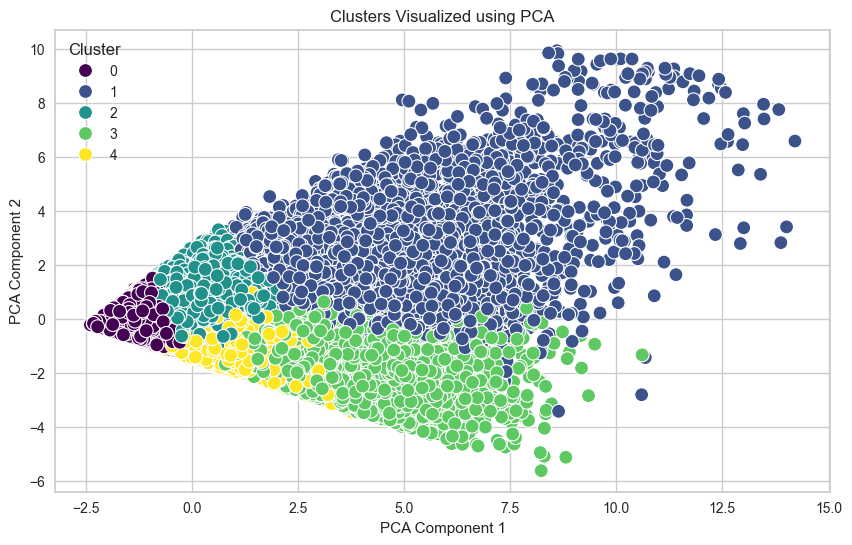

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',  # Color by cluster
    palette='viridis',  # Color palette
    data=selected_df,
    s=100  # Size of points
)
plt.title('Clusters Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [146]:
# Group the data by cluster and calculate the mean values of the features
cluster_summary = selected_df.groupby('Cluster').mean()

# Display the cluster summary
cluster_summary

,Calories,FatContent,ProteinContent,CarbohydrateContent,PCA1,PCA2
Cluster,,,,,,
0,-0.825103,-0.655725,-0.639601,-0.555683,-1.352252,0.003946
1,2.136233,0.680182,1.201039,2.650239,3.293841,1.590546
2,0.237317,0.131559,-0.285630,0.521667,0.290479,0.493636
3,1.622954,2.198235,1.329628,0.135352,2.739249,-1.211055
4,0.336109,0.278914,1.223550,-0.373123,0.760496,-0.854247


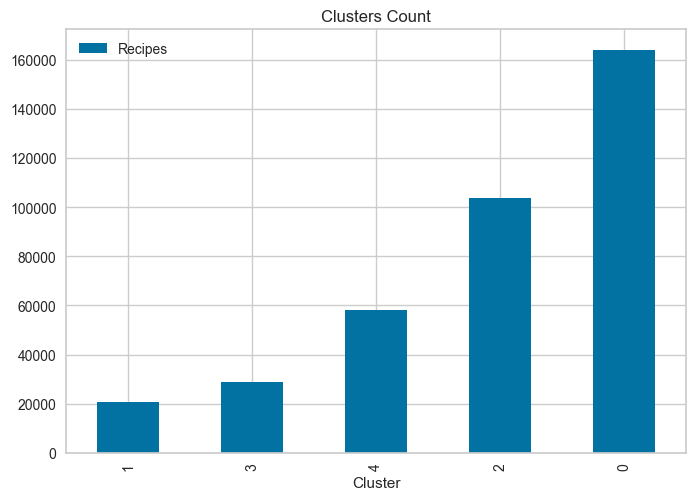

In [147]:
selected_df['Cluster'].value_counts().sort_values().plot(kind = "bar")
plt.legend(['Recipes'])
plt.title("Clusters Count" );

<Figure size 1200x600 with 0 Axes>

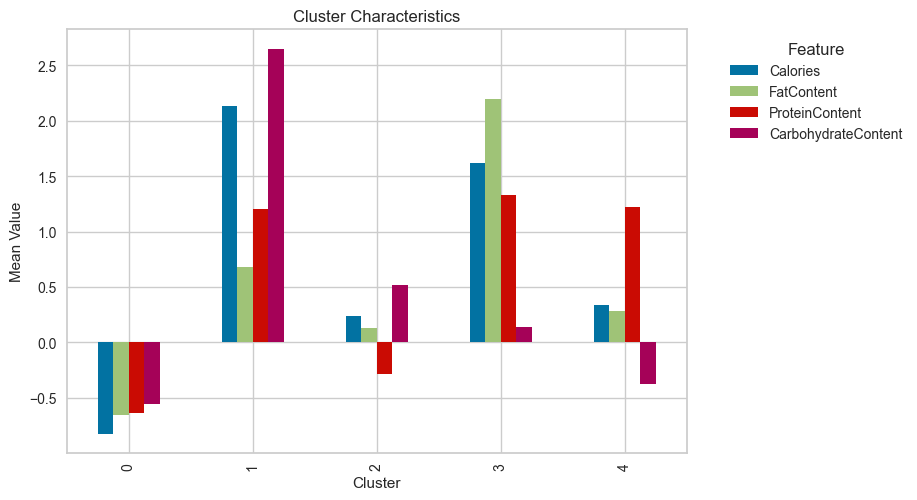

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the mean values of features for each cluster
plt.figure(figsize=(12, 6))
cluster_summary.iloc[:, :4].plot(kind='bar', stacked=False)
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

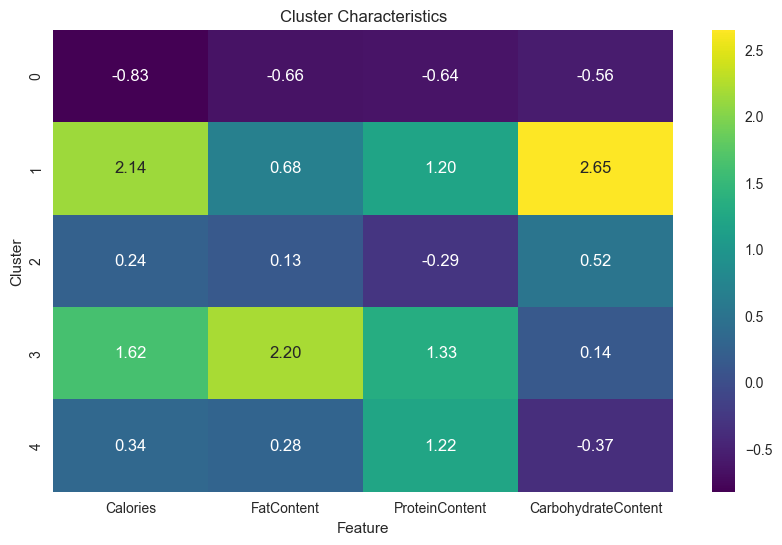

In [149]:
# Plot a heatmap of cluster characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.iloc[:, :4], annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Characteristics')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [150]:
user_needs = {
    'Calories': 2628.28,
    'FatContent': 87.61,
    'ProteinContent': 164.27,
    'CarbohydrateContent': 295.68
}
user_df = pd.DataFrame([user_needs])

# Scale the user's feature vector
user_df_scaled = Scaler.transform(user_df)

In [151]:
import numpy as np
np.array([[13.07648342,  7.17942032, 11.2578189 , 11.11829472]])

array([[13.07648342,  7.17942032, 11.2578189 , 11.11829472]])

In [23]:
# Predict the cluster for the user
user_cluster = kmeans.predict(user_df_scaled)

# Display the predicted cluster
print("User's Cluster:", user_cluster[0])

User's Cluster: 1


In [25]:
data

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,...,ProteinContent,RecipeInstructions,Images,DietCategory,high-fiber,high-protein,low-calorie,low-carb,low-fat,low-sodium
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"['blueberries', 'granulated sugar', 'vanilla y...",170.9,2.5,1.3,8.0,...,3.2,"['Toss 2 cups berries with sugar.', 'Let stand...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-fat', 'low-calorie', 'low-sodium']",0,0,1,0,1,1
1,41,Carina's Tofu-Vegetable Kebabs,20,1440,1460,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",536.1,24.0,3.8,0.0,...,29.3,"['Drain the tofu', 'carefully squeezing out ex...",['https://img.sndimg.com/food/image/upload/w_5...,"['high-protein', 'high-fiber']",1,1,0,0,0,0
2,42,Cabbage Soup,30,20,50,"['plain tomato juice', 'cabbage', 'onion', 'ca...",103.6,0.4,0.1,0.0,...,4.3,['Mix everything together and bring to a boil....,['https://img.sndimg.com/food/image/upload/w_5...,"['low-carb', 'low-fat', 'low-calorie']",0,0,1,1,1,0
3,45,Buttermilk Pie With Gingersnap Crumb Crust,50,30,80,"['sugar', 'margarine', 'egg', 'flour', 'salt',...",228.0,7.1,1.7,24.5,...,4.2,"['Preheat oven to 350°F.', 'Make pie crust', '...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-fat', 'low-calorie', 'low-sodium']",0,0,1,0,1,1
4,46,A Jad - Cucumber Pickle,0,25,25,"['rice vinegar', 'haeo']",4.3,0.0,0.0,0.0,...,0.1,"['Slice the cucumber in four lengthwise', 'the...",['https://img.sndimg.com/food/image/upload/w_5...,"['low-carb', 'low-fat', 'low-calorie', 'low-so...",0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375698,541375,Amazing Ground Beef Stroganoff,20,30,50,"['hamburger', 'onion', 'celery', 'water chestn...",422.3,28.6,12.6,106.0,...,27.3,['Saute meat in a medium skillet until it lose...,[],"['high-protein', 'low-carb']",0,1,0,1,0,0
375699,541376,Spanish Coffee with Tia Maria,0,10,10,"['lemon wedge', 'granulated sugar', 'cognac', ...",84.3,2.1,1.2,6.8,...,0.6,['Cut a small slit in the lemon wedge and slid...,[],"['low-carb', 'low-fat', 'low-calorie', 'low-so...",0,0,1,1,1,1
375700,541377,Slow-Cooker Classic Coffee Cake,180,20,200,"['all-purpose flour', 'brown sugar', 'butter',...",358.9,19.8,10.5,103.1,...,4.8,['Line bottom and sides of 5-quart oval slow c...,['https://img.sndimg.com/food/image/upload/w_5...,[],0,0,0,0,0,0
375701,541379,Meg's Fresh Ginger Gingerbread,35,60,95,"['fresh ginger', 'unsalted butter', 'dark brow...",316.6,12.5,7.6,54.4,...,3.9,['Preheat oven to 350&deg;F Grease an 8x8 cake...,['https://img.sndimg.com/food/image/upload/w_5...,['low-sodium'],0,0,0,0,0,1


In [152]:
# Filter recipes in the predicted cluster
recommended_recipes = recommended_recipes[recommended_recipes['Cluster'] == user_cluster[0]]


In [161]:

type(recommended_recipes.sample(10).to_dict(orient='records')[0]['RecipeInstructions'])

list

In [31]:
import pickle

In [33]:
with open("KMeans_Model.pkl", 'wb') as model:
    pickle.dump(kmeans, model)

In [32]:
with open("KMeans_Model.pkl", 'rb') as model_r:
    km_model = pickle.load(model_r)

In [33]:
cluster_summary

,Calories,FatContent,ProteinContent,CarbohydrateContent,PCA1,PCA2
Cluster,,,,,,
0,-0.825103,-0.655725,-0.639601,-0.555683,-1.352252,0.003946
1,2.136233,0.680182,1.201039,2.650239,3.293841,1.590546
2,0.237317,0.131559,-0.285630,0.521667,0.290479,0.493636
3,1.622954,2.198235,1.329628,0.135352,2.739249,-1.211055
4,0.336109,0.278914,1.223550,-0.373123,0.760496,-0.854247


In [ ]:
# it must be by meal not by the whole day

user_needs = {
    'Calories': 200.460115,
    'FatContent': 8.203982,
    'ProteinContent': 6.790533,
    'CarbohydrateContent': 30.698844 
}
user_df = pd.DataFrame([user_needs])

# Scale the user's feature vector
user_df_scaled = Scaler.transform(user_df)

In [35]:
clus = km_model.predict(user_df_scaled)

In [36]:
clus

array([0], dtype=int32)

In [ ]:
313.042291	13.484234	8.565107	40.629584

# Create the search module

In [35]:
import ast

In [42]:
data['RecipeIngredientParts'][0]

"['blueberries', 'granulated sugar', 'vanilla yogurt', 'lemon juice']"

In [43]:
# First we convert the ingredient parts to an actual list and store it in new dataframe
search_df = pd.DataFrame(data['RecipeIngredientParts'].apply(ast.literal_eval))

In [44]:
search_df.head()

,RecipeIngredientParts
0,"[blueberries, granulated sugar, vanilla yogurt..."
1,"[extra firm tofu, eggplant, zucchini, mushroom..."
2,"[plain tomato juice, cabbage, onion, carrots, ..."
3,"[sugar, margarine, egg, flour, salt, buttermil..."
4,"[rice vinegar, haeo]"


In [45]:
# Combine ingredients into a single string for each recipe
search_df['IngredientsString'] = search_df['RecipeIngredientParts'].apply(lambda x: ' '.join(x).lower())

In [34]:
search_df.to_csv("search_data.csv",index = False)

In [46]:
# Second we create TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the ingredients into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(search_df['IngredientsString'])

In [47]:
# Building the NLP model
from sklearn.metrics.pairwise import cosine_similarity

def search_by_ingredient(Ingredient, top_match=5):
    
    # it must be separted by comma
    Ingredient = Ingredient.lower().replace(',','').replace(" ", "")   
    Ingredient_vector = vectorizer.transform([Ingredient])
    print(Ingredient, Ingredient_vector)
    # Compute cosine similarity between the user input and all recipes
    similarities = cosine_similarity(Ingredient_vector, tfidf_matrix).flatten()
    top_indices = similarities.argsort()[-top_match:][::-1]

    return data.iloc[top_indices]

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the ingredients into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(search_df['IngredientsString'])

def search_by_ingredient(Ingredient, top_match=5):
    
    # it must be separted by comma
    Ingredient = Ingredient.lower().replace(',','').replace(" ", "")   
    Ingredient_vector = vectorizer.transform([Ingredient])
    
    # Compute cosine similarity between the user input and all recipes
    similarities = cosine_similarity(Ingredient_vector, tfidf_matrix).flatten()
    top_indices = similarities.argsort()[-top_match:][::-1]

    return data.iloc[top_indices]

In [51]:
# Example usage
user_input = "rice,   butter"
similar_recipes = search_by_ingredient(user_input, 5)

# Display the results
similar_recipes[['RecipeId', 'Name', 'RecipeIngredientParts']].to_json()

'{"RecipeId":{"0":38,"375702":541382,"375701":541379,"375700":541377,"375699":541376},"Name":{"0":"Low-Fat Berry Blue Frozen Dessert","375702":"Quick & Easy Asian Cucumber Salmon Rolls","375701":"Meg\'s Fresh Ginger Gingerbread","375700":"Slow-Cooker Classic Coffee Cake","375699":"Spanish Coffee with Tia Maria"},"RecipeIngredientParts":{"0":"[\'blueberries\', \'granulated sugar\', \'vanilla yogurt\', \'lemon juice\']","375702":"[\'wasabi paste\', \'dill\', \'English cucumber\', \'smoked salmon\', \'pickled ginger\']","375701":"[\'fresh ginger\', \'unsalted butter\', \'dark brown sugar\', \'dark corn syrup\', \'molasses\', \'egg\', \'salt\', \'all-purpose flour\', \'baking soda\', \'cinnamon\', \'ground cloves\', \'buttermilk\']","375700":"[\'all-purpose flour\', \'brown sugar\', \'butter\', \'ground cinnamon\', \'salt\', \'sour cream\', \'butter\', \'eggs\', \'powdered sugar\', \'milk\', \'vanilla\']","375699":"[\'lemon wedge\', \'granulated sugar\', \'cognac\', \'brandy\', \'maraschin